In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_2017 = pd.read_csv('/Users/rakesh/Documents/DSC167/hmda_2017_nationwide_all-records_labels.csv', 
                      dtype = {'msamd': str, 'state_code': str, 'county_code': str, 'census_tract_number': str,
                              'denial_reason_1':str, 'denial_reason_2': str, 'denial_reason_3': str})

/Users/rakesh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Rakesh Senthilvelan and Shin Ehara

## Introduction

When it comes to lending, there have always been disparities between different groups of people in terms of acceptance and accessibility. There have been numerous ways in which discrimination has been employed throughout the years, with lending being one of the largest areas. We wanted to examine the disparities that exist between groups based on race, gender, and sexual orientation among others. The reason we came to these disparities was based on reading previous works done through research institutions such as Vanderbilt University (https://business.vanderbilt.edu/news/2020/07/20/racial-disparities-in-lending-markets/), Proceedings of the National Academy of Sciences of the United States of America (https://www.pnas.org/content/116/19/9293), and the National Community Reinvestment Coalition (https://ncrc.org/wp-content/uploads/2009/07/ncrc%20nosheild%20june%2009.pdf). We wanted to see the specificities of these disparities in terms of how they are carried out in the real world, whether certain other inequities have a domino effect towards lending data, and what potential solutions there may be to this disparity. To look into this, we took in data from the HMDA, short for the Home Mortgage Disclosure Act, which will show data on loan applications for houses. We will be able to see many factors such as race, gender of applicant and co-applicant, income bracket, reason for loan denial, and more. Throughout the research project, we will dive into different areas of discrimination or bias seen in lending data provided by the HMDA in 2017, finding the reasons behind them, and looking into potential areas that will need to be addressed by lenders in the future for a more equitbale experience for everybody.

## Justification for the Data in Approaching the Problem at Hand

The data provided by HMDA dataset provides a lot of insight into the inequities that are present in loans. The data in question is the most recently available set to us, which is 2017. In the preliminary exploratory data analysis, we looked into three factors: application status based on race, application status based on the sex of the applicant and co-applicant, and the reasons for denial based on race. What we found in this step was interesting. In terms of application status based on race, we noticed significant discrepancies for loan approvals by race, with White and Asian applicants seeing approval ratings around 58%, Hawaiian Native and Pacfic Islander applicants around 51%, and Native American and Black applicants around 44-45%. This shows a significant gap in loan approval ratings between racial groups and this is something we look to further examine in our paper. For the sex of applicant and co-applicant, we wanted to see if there were any significant discrepancies. While we cannot assume that an applicant and a co-applicant would be in a relationship, we thought it would be important to see the approval and rejection ratings for these combinations. What we noted was that generally, applications where a male is the applicant and a female is a co-applicant have the highest approval rating at around 61%, with female applicant and male co-applicant following at 58.8%, male applicant and co-applicant at 58%, and female appplicant and co-applicant at 55.1%. We noticed somewhat significant differences between these rates and we look to further explore this area. Finally, we looked at reasons for rejection by race. While the rankings of denial reasons were roughly similar amongst all groups, we noticed some differences in the percentages that these reasons made up for each group. We believe this will be an interesting area to further examine in the final paper. Based on our EDA, we found numerous statistical differences in the loan data that would potentially point to inequities in this system of America. As a result, this dataset is a strong source to examine the problem at hand and examine the specificities of this inequity in our society.

## Where Does the Data Have Shortcomings?

The data is limited in a few ways. The first is that this is limited to mortgage data from 2017, which limits the amount of overall lending data that is done in the country. Generally, there are many cases where people in this country would not or can not become home buyers. Looking into other, more accesible forms of loans such as car loans would have also been useful in studying the deeper parts of inequity in lending. In addition, there are many cases where the data in this set has missing or undisclosed values for race data. While there are still significant portions of the data that are labeled, there are a lot that have significant statistics attached to them but with race being disclosed as "Information not disclosed by applicant in mail, Internet, or telephone application" or "Not applicable". In the scope of our project, these data points are lost as we cannot decipher their meaning in relation to the inequity we are trying to spotlight. 

## The Context of the Inequity

The financial inequities faced by minority populations is not a new concept. According to a report done in 1996 by the Federal Reserve Bank of Boston, it was found that there existed a discrepancy where, when it came to mortgage applications, "minority applicants with the same economic and property characteristics as white applicants would experience a denial rate of 17 percent rather than the actual white denial rate of 11 percent". To further understand this discepancy, we must look into concepts of equality. From an egalitarian perspective, this shows a significant discrepancy, with a look into the comparative nature of the above statement showing that there is not equal access to the opportunity of receiving a mortgage. From a Rawlisian perspective, this discrepancy does not entitle everybody from the same financial background to the same liberties and opportunities in purchasing a house. This shows that when looking at this research from multiple perspectives of equality, they universally conclude that there is inequality in this situation. However, this was in 1996, that brings forward the question. Has this inequity gotten better since then? In a study from Professor Mark Cohen of Vanderbilt University in July of 2020, it was found that "African Americans pay twice the markup whites did". This indicates that inequality still exists in the lending industry against minority groups when it comes to loan rejection rates and markups on properties. 

## Hypothesis

Based on our preliminary exploratory data analysis and the historical context of this issue, we have the alternative hypothesis that when it comes to mortgage lending that there are significant discrepancies between different racial groups when it comes to loan approval in similar income and loan amount brackets. Our null hypothesis is that there is no significant discrepancy between loan appovals by race within similar income and loan amount brackets. 

## Regarding Application Status Based on Race

In [3]:
df_race_action = df_2017[['action_taken_name','action_taken','applicant_race_name_1','applicant_race_1']]

In [4]:
white_action = df_race_action[df_race_action['applicant_race_1'] == 5]

The key for actions is as follows: 1 represents loan originated, 2 represents application approved but not accepted, 3 represents application denied by financial institution, 4 represents application withdrawn by applicant, 5 represents file closed for incompleteness, 6 represents loan purchased by institution, 7 represents Preapproval request denied by financial institution, and 8 represents Preapproval request approved but not accepted (optional reporting).

These are the loan actions taken for white applicants.

In [5]:
white_action['action_taken'].value_counts(normalize=True) * 100

1    58.993101
3    13.936836
4    12.444372
6     6.344793
5     4.211396
2     3.129952
7     0.666690
8     0.272859
Name: action_taken, dtype: float64

In [6]:
black_action = df_race_action[df_race_action['applicant_race_1'] == 3]

These are the loan actions taken for Black applicants.

In [7]:
black_action['action_taken'].value_counts(normalize=True) * 100

1    45.334724
3    24.862152
4    14.197212
5     5.989391
6     3.897338
2     3.360810
7     2.195089
8     0.163283
Name: action_taken, dtype: float64

In [8]:
na_action = df_race_action[df_race_action['applicant_race_1'] == 1]

These are the loan actions taken for Native American applicants.

In [9]:
na_action['action_taken'].value_counts(normalize=True) * 100

1    44.667299
3    25.251852
4    14.837391
5     6.781764
6     3.629959
2     3.164580
7     1.488302
8     0.178852
Name: action_taken, dtype: float64

These are the loan actions taken for Asian applicants.

In [10]:
asian_action = df_race_action[df_race_action['applicant_race_1'] == 2]
asian_action['action_taken'].value_counts(normalize=True) * 100

1    58.277401
4    13.691896
3    12.536359
6     6.712867
5     4.321741
2     3.233973
7     0.732019
8     0.493744
Name: action_taken, dtype: float64

These are the loan actions taken for Native Hawaiian or other Pacific Islander applicants.

In [11]:
pa_action = df_race_action[df_race_action['applicant_race_1'] == 4]
pa_action['action_taken'].value_counts(normalize=True) * 100

1    51.913531
3    18.328900
4    14.479814
5     5.507649
6     4.997713
2     3.015569
7     1.597574
8     0.159249
Name: action_taken, dtype: float64

When looking at the rates of rejection for different racial groups, this is what comes up. This shows a significant discrepancy between rejection rates based on race, with the rates for Black and Native American applicants being almost double that of White and Asian applicants. 

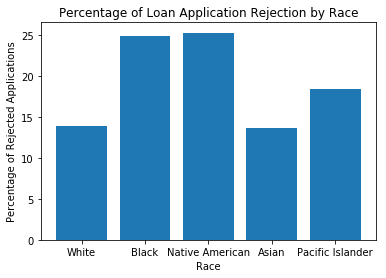

In [12]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [13.936836, 24.862152, 25.251852, 13.691896, 18.328900]

plt.bar(race, reject)
plt.title('Percentage of Loan Application Rejection by Race')
plt.xlabel('Race')
plt.ylabel('Percentage of Rejected Applications')
plt.show()

## Regarding Application Status Based on Sex of Applicant and Co-Applicant

In [13]:
df_action_gender = df_2017[['applicant_sex_name','applicant_sex','co_applicant_sex_name','co_applicant_sex','action_taken_name','action_taken']]

The key for actions is as follows: 1 represents loan originated, 2 represents application approved but not accepted, 3 represents application denied by financial institution, 4 represents application withdrawn by applicant, 5 represents file closed for incompleteness, 6 represents loan purchased by institution, 7 represents Preapproval request denied by financial institution, and 8 represents Preapproval request approved but not accepted (optional reporting).

These are the loan actions taken when the main applicant is male and the co-applicant is female.

In [14]:
m_f = df_action_gender[(df_action_gender['applicant_sex']==1) & (df_action_gender['co_applicant_sex'] == 2)]
m_f['action_taken'].value_counts(normalize=True) * 100

1    61.082976
4    12.395166
3    11.823354
6     6.582495
5     4.188526
2     3.055464
7     0.595727
8     0.276292
Name: action_taken, dtype: float64

These are the loan actions taken when the main applicant is female and the co-applicant is male.

In [15]:
f_m = df_action_gender[(df_action_gender['applicant_sex']==2) & (df_action_gender['co_applicant_sex'] == 1)]
f_m['action_taken'].value_counts(normalize=True) * 100

1    58.772253
3    14.716190
4    12.203630
6     5.869638
5     4.144491
2     3.055725
7     0.913898
8     0.324175
Name: action_taken, dtype: float64

These are the loan actions taken when the main applicant is male and the co-applicant is male.

In [16]:
m_m = df_action_gender[(df_action_gender['applicant_sex']==1) & (df_action_gender['co_applicant_sex'] == 1)]
m_m['action_taken'].value_counts(normalize=True) * 100

1    58.003196
3    15.100793
4    11.925589
6     7.169793
5     3.974963
2     2.903945
7     0.735274
8     0.186447
Name: action_taken, dtype: float64

These are the loan actions taken when the main applicant is female and the co-applicant is female.

In [17]:
f_f = df_action_gender[(df_action_gender['applicant_sex']==2) & (df_action_gender['co_applicant_sex'] == 2)]
f_f['action_taken'].value_counts(normalize=True) * 100

1    55.149407
3    17.625607
4    12.118420
6     6.512960
5     4.525981
2     2.909834
7     0.953566
8     0.204226
Name: action_taken, dtype: float64

## Looking Into Reasons for Denial By Race

In [18]:
df_denials = df_2017[['action_taken_name','action_taken','applicant_race_name_1','applicant_race_1',
                     'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2',
                      'denial_reason_2', 'denial_reason_name_3', 'denial_reason_3',]]

The key for denial reasons are as follows: 1 represents Debt-to-income ratio, 2 represents Employment history, 3 represents Credit history, 4 represents Collateral, 5 represents Insufficient cash (downpayment, closing costs), 6 represents Unverifiable information, 7 represents Credit application incomplete, 8 represents Mortgage insurance denied, and 9 represents Other.

This is the distribution of denial reasons for Native Americans applicants. 

In [19]:
na_denial = df_denials[df_denials['applicant_race_1'] == 1]
na_counts = na_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(na_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,8328,0.369542
1,1,5798,0.257277
2,9,2381,0.105653
3,4,2147,0.095270
4,7,1740,0.077210
5,5,936,0.041534
6,6,777,0.034478
7,2,384,0.017039
8,8,45,0.001997


This is the distribution of denial reasons for Asian applicants. 

In [20]:
as_denial = df_denials[df_denials['applicant_race_1'] == 2]
as_counts = as_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(as_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,1,26872,0.318019
1,3,15163,0.179448
2,4,9839,0.116441
3,9,9304,0.110109
4,7,9289,0.109932
5,6,6302,0.074582
6,5,5325,0.063019
7,2,2253,0.026663
8,8,151,0.001787


This is the distribution of denial reasons for Black applicants. 

In [21]:
bl_denial = df_denials[df_denials['applicant_race_1'] == 3]
bl_counts = bl_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(bl_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,86281,0.373391
1,1,58779,0.254373
2,9,25282,0.109411
3,4,21887,0.094719
4,7,15457,0.066892
5,5,12601,0.054532
6,6,6923,0.029960
7,2,3472,0.015025
8,8,392,0.001696


This is the distribution of denial reasons for Native Hawaiian or other Pacific Islander applicants. 

In [22]:
pa_denial = df_denials[df_denials['applicant_race_1'] == 4]
pa_counts = pa_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(pa_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,3395,0.313221
1,1,3065,0.282775
2,9,1233,0.113756
3,4,1057,0.097518
4,7,887,0.081834
5,5,576,0.053141
6,6,411,0.037919
7,2,202,0.018636
8,8,13,0.001199


This is the distribution of denial reasons for White applicants. 

In [23]:
wh_denial = df_denials[df_denials['applicant_race_1'] == 5]
wh_counts = wh_denial[['denial_reason_1','denial_reason_2','denial_reason_3']]
count = pd.Series(wh_counts.squeeze().values.ravel()).value_counts()
pd.DataFrame({'Denial Reason': count.index, 'Count':count.values, 'Percentage':(count/count.sum()).values})

,Denial Reason,Count,Percentage
0,3,307209,0.277187
1,1,285249,0.257373
2,4,161464,0.145685
3,9,115495,0.104208
4,7,112956,0.101917
5,5,51627,0.046582
6,6,48620,0.043869
7,2,23504,0.021207
8,8,2185,0.001971


## The Effects of Income on Loan Approval

When we first looked into the exploratory data analysis on application statuses based on raced, we noticed significant disparities between different racial groups in terms of the percentages that were accepted for loans. We first wanted to see if there were other disparities that may have impacted these statistics. The first was to look into income data and see if there are major disparities here that may lead to certain racial groups seeing higher rates of rejection. 

In [24]:
df_2017.groupby(['applicant_race_1'])['applicant_income_000s'].median()

applicant_race_1
1     66.0
2    107.0
3     64.0
4     80.0
5     78.0
6     84.0
7     77.0
Name: applicant_income_000s, dtype: float64

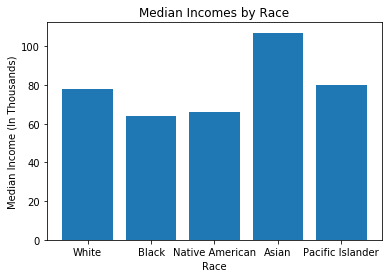

In [25]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [78.0, 64.0, 66.0, 107.0, 80.0]

plt.bar(race, reject)
plt.title('Median Incomes by Race')
plt.xlabel('Race')
plt.ylabel('Median Income (In Thousands)')
plt.show()

From the above statistics, we can see that the median incomes of each racial group roughly coincides with the acceptance rates on loans. The one discrepancy we see is with Native Hawaiian or other Pacific Islander applicants, which in the case of median show a slightly higher median income compared to White applicants depsite having a 7% lower acceptance rate. We believe that this may be due to a limited sample of this group of applicants in this dataset compared to White applicants, but it is possible that this could point to a significant inequity in this system. The main takeaway was that median incomes show relations to the rates of application acceptance, with White and Asian applicants showing higher rates of loan approvals along with higher median incomes while Black and Native American applicants showed lower median incomes and lower rates of loan approvals. 

In [26]:
df_2017.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

## A Look Into Median Loan Amounts Taken by Each Group

To look further into this disparity, we wanted to look into the median loan amounts that are seen by these different racial groups. From here, we hope to compare the amounts relative to income and see if there is a significant disparity between different racial groups receiving different results despite having similar financial conditions and loan requests. 

In [27]:
df_2017.groupby(['applicant_race_1'])['loan_amount_000s'].median()

applicant_race_1
1    150.0
2    293.0
3    157.0
4    229.0
5    180.0
6    194.0
7    190.0
Name: loan_amount_000s, dtype: float64

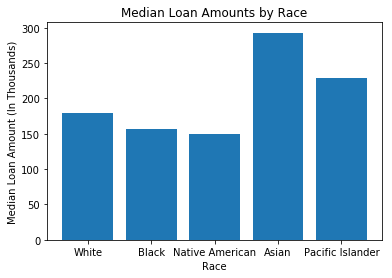

In [28]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [180.0, 157.0, 150.0, 293.0, 229.0]

plt.bar(race, reject)
plt.title('Median Loan Amounts by Race')
plt.xlabel('Race')
plt.ylabel('Median Loan Amount (In Thousands)')
plt.show()

Through this, we can see that the difference between White, Black, and Native American loan amounts is not as significant as the difference in rejection rates or even income. 

## The Relationship Between Amount Loaned and Income

To further dive into any disparities in this area, we wanted to look into the relationship between the amount loaned and the income of the people applying for them. To do this, we created a column that took the ratio of loan amount by income, grouped by each racial group, and took the median. We believe that if all these values are similar that there is a sign of inequity in the lending data based on racial groups. 

In [29]:
df_2017['loan_to_income'] = df_2017['loan_amount_000s']/df_2017['applicant_income_000s']

In [30]:
df_2017.groupby(['applicant_race_1'])['loan_to_income'].median()      

applicant_race_1
1    2.333333
2    2.923913
3    2.500000
4    2.890625
5    2.368421
6    2.398148
7    2.702703
Name: loan_to_income, dtype: float64

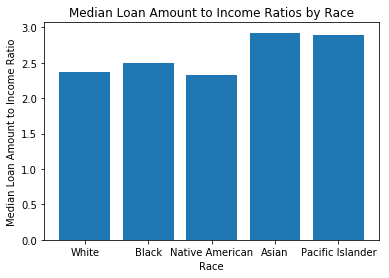

In [31]:
race = ['White', 'Black', 'Native American', 'Asian', 'Pacific Islander']
reject = [2.368421, 2.500000, 2.333333, 2.923913, 2.890625]

plt.bar(race, reject)
plt.title('Median Loan Amount to Income Ratios by Race')
plt.xlabel('Race')
plt.ylabel('Median Loan Amount to Income Ratio')
plt.show()

When looking into the factors that developed these ratios, we wanted to rule out other factors that may skew the ratios. We know that some racial groups are more represented than other in this dataset, so we wanted to make sure that the number of loans may skew the averages of these ratios. In order to accomodate this, we used median as our measure to get a value that was more robust to significant outliers and numbers of loans. In terms of comparing loan amounts to incomes, our analysis in the past two charts indicate that the two scale with each other. This would mean that there are not many cases that would result in significant effects in our analysis except for in the case of Asian and Pacific Islander applicants. 

## Fairness Quantitative Measures

To see how significant these figures are, we decided to look into these statistics by sampling based on income. We wanted to see if similar income groups and loan amounts had varying outcomes for action taken on the loan when looking at racial group as a factor. For the purpose of this analysis, we will be focusing on the lending experiences faced by Black and White applicants. The fairness of the mortgage lending system will be based on the criteria of group fairness as opposed to individual fairness (https://fairmlbook.org/tutorial2.html). We will also do our fairness analysis based on income group to better sample the data during our comparisons.

In [37]:
df_fair = df_2017[['applicant_race_1','applicant_income_000s','loan_amount_000s', 'action_taken','loan_to_income']]
df_fair

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
0,3,12.0,53.0,4,4.416667
1,5,60.0,168.0,3,2.800000
2,6,50.0,103.0,5,2.060000
3,5,53.0,88.0,1,1.660377
4,5,29.0,90.0,4,3.103448
...,...,...,...,...,...
14285491,6,167.0,832.0,1,4.982036
14285492,6,193.0,840.0,3,4.352332
14285493,6,175.0,476.0,1,2.720000
14285494,5,55.0,141.0,3,2.563636


For this section, we decided to sample based on the income brackets set by the Federal Income Brackets as of 2020-2021. First, we took into account the range of incomes between 0 and $10,000 yearly. 

In [51]:
range_0_10 = np.arange(0.0,10.0)
df_0_10 = df_fair.loc[(df_fair['applicant_income_000s'].isin(range_0_10))]
df_0_10

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
465,5,3.0,55.0,1,18.333333
600,6,2.0,1.0,3,0.500000
644,3,9.0,185.0,3,20.555556
697,6,7.0,150.0,3,21.428571
868,1,3.0,30.0,3,10.000000
...,...,...,...,...,...
14283448,5,8.0,424.0,1,53.000000
14284031,6,8.0,3.0,1,0.375000
14284277,6,9.0,285.0,1,31.666667
14284466,5,9.0,125.0,3,13.888889


In [52]:
df_0_10.groupby(['applicant_race_1'])['loan_to_income'].median()      

applicant_race_1
1    10.000000
2    38.333333
3     7.500000
4    23.250000
5    19.000000
6    28.222222
7    36.687500
Name: loan_to_income, dtype: float64

In [53]:
df_0_10.applicant_race_1.value_counts()

5    22213
6     8103
3     4613
2     1380
7      662
1      599
4      165
Name: applicant_race_1, dtype: int64

In [54]:
white_action = df_0_10[df_0_10['applicant_race_1'] == 5]
white_action['action_taken'].value_counts(normalize=True) * 100

3    55.494530
1    21.676496
4    12.879845
5     3.894116
2     2.894701
7     2.507541
6     0.436681
8     0.216090
Name: action_taken, dtype: float64

In [55]:
white_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,22213.0,22213.000000,22210.000000,22213.000000,22210.000000
mean,5.0,5.330977,130.696713,2.868410,53.422605
std,0.0,2.984040,158.250872,1.287579,99.585795
min,5.0,1.000000,1.000000,1.000000,0.111111
25%,5.0,2.000000,37.000000,3.000000,5.750000
50%,5.0,6.000000,90.000000,3.000000,19.000000
75%,5.0,8.000000,177.000000,3.000000,54.000000
max,5.0,9.000000,5000.000000,8.000000,2345.000000


In [56]:
black_action = df_0_10[df_0_10['applicant_race_1'] == 3]
black_action['action_taken'].value_counts(normalize=True) * 100

3    70.951658
1    11.294169
4     8.367657
7     3.750271
5     3.078257
2     1.951008
6     0.585302
8     0.021678
Name: action_taken, dtype: float64

In [57]:
black_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,4613.0,4613.000000,4613.000000,4613.000000,4613.000000
mean,3.0,5.568177,80.717321,3.068502,30.011100
std,0.0,3.018726,117.063364,1.154045,65.131533
min,3.0,1.000000,1.000000,1.000000,0.111111
25%,3.0,3.000000,5.000000,3.000000,1.500000
50%,3.0,6.000000,48.000000,3.000000,7.500000
75%,3.0,9.000000,108.000000,3.000000,29.200000
max,3.0,9.000000,3000.000000,8.000000,1240.000000


Next, we looked into the bracket between $10,000 and $40,000 yearly. 

In [58]:
range_10_40 = np.arange(10,40)
df_10_40 = df_fair.loc[(df_fair['applicant_income_000s'].isin(range_10_40))]
df_10_40

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
0,3,12.0,53.0,4,4.416667
4,5,29.0,90.0,4,3.103448
9,5,31.0,94.0,1,3.032258
10,3,26.0,95.0,3,3.653846
11,5,36.0,38.0,3,1.055556
...,...,...,...,...,...
14285480,5,20.0,140.0,4,7.000000
14285481,5,38.0,122.0,1,3.210526
14285483,5,18.0,30.0,5,1.666667
14285484,6,32.0,164.0,1,5.125000


In [59]:
df_10_40.groupby(['applicant_race_1'])['loan_to_income'].median()      

applicant_race_1
1    2.892857
2    4.347826
3    2.911765
4    3.656250
5    3.192928
6    3.333333
7    3.600000
Name: loan_to_income, dtype: float64

In [60]:
white_action = df_10_40[df_10_40['applicant_race_1'] == 5]
white_action['action_taken'].value_counts(normalize=True) * 100

1    48.383400
3    26.015737
4    11.798059
5     4.775552
6     3.965685
2     3.360491
7     1.435108
8     0.265968
Name: action_taken, dtype: float64

In [61]:
black_action = df_10_40[df_10_40['applicant_race_1'] == 3]
black_action['action_taken'].value_counts(normalize=True) * 100

3    39.880038
1    33.051776
4    11.873208
5     6.363773
2     3.218670
7     3.002803
6     2.458840
8     0.150892
Name: action_taken, dtype: float64

In [62]:
black_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,186226.0,186226.000000,186220.000000,186226.000000,186220.000000
mean,3.0,28.777271,88.845962,2.754207,3.226852
std,0.0,7.505715,66.074965,1.551324,2.914246
min,3.0,10.000000,1.000000,1.000000,0.025641
25%,3.0,24.000000,45.000000,1.000000,1.625000
50%,3.0,30.000000,81.000000,3.000000,2.911765
75%,3.0,35.000000,124.000000,3.000000,4.210526
max,3.0,39.000000,2101.000000,8.000000,122.727273


In [64]:
white_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,1212174.0,1.212174e+06,1.211984e+06,1.212174e+06,1.211984e+06
mean,5.0,2.953894e+01,1.000539e+02,2.401892e+00,3.564041e+00
std,0.0,7.129614e+00,1.149595e+02,1.604130e+00,6.851670e+00
min,5.0,1.000000e+01,1.000000e+00,1.000000e+00,2.564103e-02
25%,5.0,2.500000e+01,5.800000e+01,1.000000e+00,2.038462e+00
50%,5.0,3.100000e+01,9.200000e+01,2.000000e+00,3.192928e+00
75%,5.0,3.500000e+01,1.320000e+02,3.000000e+00,4.413793e+00
max,5.0,3.900000e+01,9.999900e+04,8.000000e+00,6.666600e+03


Next, we looked into the bracket between $40,000 and $85,000 yearly. This area is of particular interest as it encompasses the median range for most of the population. 

In [65]:
range_40_85 = np.arange(40,85)
df_40_85 = df_fair.loc[(df_fair['applicant_income_000s'].isin(range_40_85))]
df_40_85

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
1,5,60.0,168.0,3,2.800000
2,6,50.0,103.0,5,2.060000
3,5,53.0,88.0,1,1.660377
5,5,43.0,202.0,4,4.697674
7,2,51.0,185.0,3,3.627451
...,...,...,...,...,...
14285478,5,83.0,81.0,1,0.975904
14285488,2,70.0,340.0,3,4.857143
14285489,5,84.0,324.0,3,3.857143
14285490,6,47.0,85.0,1,1.808511


In [66]:
df_40_85.groupby(['applicant_race_1'])['loan_to_income'].median()  

applicant_race_1
1    2.509091
2    3.579710
3    2.698630
4    3.294118
5    2.682927
6    2.714286
7    3.068182
Name: loan_to_income, dtype: float64

In [67]:
white_action = df_40_85[df_40_85['applicant_race_1'] == 5]
white_action['action_taken'].value_counts(normalize=True) * 100

1    59.390740
3    14.133654
4    12.190312
6     6.125517
5     4.051922
2     3.102891
7     0.729156
8     0.275808
Name: action_taken, dtype: float64

In [68]:
black_action = df_40_85[df_40_85['applicant_race_1'] == 3]
black_action['action_taken'].value_counts(normalize=True) * 100

1    47.151183
3    23.696660
4    14.010980
5     5.362210
6     3.885156
2     3.250891
7     2.470293
8     0.172628
Name: action_taken, dtype: float64

In [69]:
black_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,437357.0,437357.000000,437349.000000,437357.000000,437349.000000
mean,3.0,59.800861,160.662494,2.495819,2.710370
std,0.0,12.560781,93.256482,1.675419,1.504642
min,3.0,40.000000,1.000000,1.000000,0.011905
25%,3.0,49.000000,97.000000,1.000000,1.684932
50%,3.0,59.000000,156.000000,2.000000,2.698630
75%,3.0,70.000000,216.000000,4.000000,3.648649
max,3.0,84.000000,3100.000000,8.000000,60.784314


In [70]:
white_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,3632967.0,3.632967e+06,3.632603e+06,3.632967e+06,3.632603e+06
mean,5.0,6.085646e+01,1.656609e+02,2.210820e+00,2.757408e+00
std,0.0,1.267135e+01,1.015166e+02,1.674738e+00,1.592413e+00
min,5.0,4.000000e+01,1.000000e+00,1.000000e+00,1.190476e-02
25%,5.0,5.000000e+01,1.040000e+02,1.000000e+00,1.781250e+00
50%,5.0,6.000000e+01,1.580000e+02,1.000000e+00,2.682927e+00
75%,5.0,7.200000e+01,2.180000e+02,3.000000e+00,3.636364e+00
max,5.0,8.400000e+01,8.216900e+04,8.000000e+00,1.125603e+03


Next, we looked into the bracket between  85,000 𝑎𝑛𝑑 163,000 yearly. We wanted to see how upper middle class brackets would be treated. 

In [83]:
range_85_163 = np.arange(85,163)
df_85_163 = df_fair.loc[(df_fair['applicant_income_000s'].isin(range_85_163))]
df_85_163

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
15,5,130.0,285.0,6,2.192308
17,5,94.0,132.0,6,1.404255
18,5,144.0,570.0,3,3.958333
21,6,119.0,199.0,1,1.672269
26,6,109.0,152.0,5,1.394495
...,...,...,...,...,...
14285468,5,100.0,449.0,3,4.490000
14285470,5,150.0,320.0,4,2.133333
14285474,5,99.0,576.0,2,5.818182
14285486,6,161.0,424.0,1,2.633540


In [84]:
white_action = df_85_163[df_85_163['applicant_race_1'] == 5]
white_action['action_taken'].value_counts(normalize=True) * 100

1    62.571129
4    12.293348
3    10.164868
6     7.705853
5     3.562290
2     2.993296
7     0.415627
8     0.293590
Name: action_taken, dtype: float64

In [85]:
black_action = df_85_163[df_85_163['applicant_race_1'] == 3]
black_action['action_taken'].value_counts(normalize=True) * 100

1    51.510545
3    18.517326
4    14.858093
6     5.084964
5     4.734973
2     3.292494
7     1.811365
8     0.190241
Name: action_taken, dtype: float64

In [86]:
black_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,232863.0,232863.000000,232859.000000,232863.000000,232859.000000
mean,3.0,112.179792,251.056231,2.414660,2.267871
std,0.0,20.777051,140.149382,1.698158,1.247861
min,3.0,85.000000,1.000000,1.000000,0.006250
25%,3.0,95.000000,153.000000,1.000000,1.405660
50%,3.0,108.000000,245.000000,1.000000,2.230263
75%,3.0,127.000000,339.000000,4.000000,3.031579
max,3.0,162.000000,3705.000000,8.000000,35.164835


In [87]:
white_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,2777006.0,2.777006e+06,2.776792e+06,2.777006e+06,2.776792e+06
mean,5.0,1.149445e+02,2.520583e+02,2.175304e+00,2.221053e+00
std,0.0,2.146654e+01,1.397729e+02,1.717995e+00,1.201478e+00
min,5.0,8.500000e+01,1.000000e+00,1.000000e+00,6.172840e-03
25%,5.0,9.600000e+01,1.570000e+02,1.000000e+00,1.406593e+00
50%,5.0,1.110000e+02,2.400000e+02,1.000000e+00,2.134921e+00
75%,5.0,1.310000e+02,3.320000e+02,3.000000e+00,2.914894e+00
max,5.0,1.620000e+02,1.148000e+04,8.000000e+00,9.982609e+01


Next, we looked into the range of income between $ 163k and 207k. 

In [91]:
range_163_207 = np.arange(163,207)
df_163_207 = df_fair.loc[(df_fair['applicant_income_000s'].isin(range_163_207))]
df_163_207

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
16,6,181.0,800.0,1,4.419890
37,6,204.0,183.0,1,0.897059
71,5,167.0,294.0,6,1.760479
97,1,179.0,550.0,1,3.072626
141,5,196.0,264.0,3,1.346939
...,...,...,...,...,...
14285466,5,171.0,238.0,3,1.391813
14285476,3,186.0,332.0,1,1.784946
14285491,6,167.0,832.0,1,4.982036
14285492,6,193.0,840.0,3,4.352332


In [92]:
white_action = df_163_207[df_163_207['applicant_race_1'] == 5]
white_action['action_taken'].value_counts(normalize=True) * 100

1    63.283229
4    12.448198
3     9.027158
6     8.204628
5     3.458642
2     2.984181
8     0.301804
7     0.292158
Name: action_taken, dtype: float64

In [93]:
black_action = df_163_207[df_163_207['applicant_race_1'] == 3]
black_action['action_taken'].value_counts(normalize=True) * 100

1    52.505983
3    16.957265
4    15.401709
6     5.552137
5     4.748718
2     3.333333
7     1.319658
8     0.181197
Name: action_taken, dtype: float64

In [94]:
black_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,29250.0,29250.000000,29249.000000,29250.000000,29249.000000
mean,3.0,181.401607,328.591131,2.393949,1.816177
std,0.0,12.431187,186.859030,1.693067,1.031400
min,3.0,163.000000,1.000000,1.000000,0.004878
25%,3.0,170.000000,195.000000,1.000000,1.072222
50%,3.0,180.000000,326.000000,1.000000,1.808290
75%,3.0,191.000000,424.000000,4.000000,2.411765
max,3.0,206.000000,2800.000000,8.000000,16.000000


In [95]:
white_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,507945.0,507945.000000,507919.000000,507945.000000,507919.000000
mean,5.0,182.053679,339.860446,2.171064,1.869664
std,0.0,12.553462,222.924353,1.731324,1.230961
min,5.0,163.000000,1.000000,1.000000,0.004878
25%,5.0,171.000000,202.000000,1.000000,1.123529
50%,5.0,180.000000,324.000000,1.000000,1.788660
75%,5.0,192.000000,424.000000,3.000000,2.419162
max,5.0,206.000000,75000.000000,8.000000,428.571429


Next, we looked into the bracket of 207k to 518k. 

In [97]:
range_207_518 = np.arange(207,518)
df_207_518 = df_fair.loc[(df_fair['applicant_income_000s'].isin(range_207_518))]
df_207_518

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
8,6,278.0,1079.0,1,3.881295
12,6,490.0,45.0,3,0.091837
28,6,219.0,304.0,1,1.388128
33,1,223.0,290.0,5,1.300448
50,6,250.0,350.0,1,1.400000
...,...,...,...,...,...
14285441,5,323.0,941.0,4,2.913313
14285442,5,244.0,400.0,4,1.639344
14285453,5,256.0,200.0,1,0.781250
14285464,6,250.0,626.0,4,2.504000


In [98]:
white_action = df_207_518[df_207_518['applicant_race_1'] == 5]
white_action['action_taken'].value_counts(normalize=True) * 100

1    64.088213
4    12.485300
3     9.058271
6     7.327650
5     3.405863
2     3.068014
8     0.288357
7     0.278332
Name: action_taken, dtype: float64

In [99]:
black_action = df_207_518[df_207_518['applicant_race_1'] == 3]
black_action['action_taken'].value_counts(normalize=True) * 100

1    53.000000
3    16.980620
4    15.131783
6     5.189922
5     4.724806
2     3.426357
7     1.232558
8     0.313953
Name: action_taken, dtype: float64

In [100]:
black_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,25800.0,25800.000000,25798.000000,25800.000000,25798.000000
mean,3.0,276.802636,415.804985,2.372248,1.535375
std,0.0,68.418485,286.957318,1.686239,0.991269
min,3.0,207.000000,1.000000,1.000000,0.002083
25%,3.0,225.000000,217.000000,1.000000,0.794186
50%,3.0,253.000000,387.000000,1.000000,1.453237
75%,3.0,306.000000,554.750000,4.000000,2.083333
max,3.0,517.000000,3850.000000,8.000000,12.663755


In [101]:
white_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,628387.0,628387.000000,628361.000000,628387.000000,628361.000000
mean,5.0,290.842042,473.072980,2.125906,1.655093
std,0.0,75.959667,341.257482,1.693332,1.098807
min,5.0,207.000000,1.000000,1.000000,0.001934
25%,5.0,230.000000,249.000000,1.000000,0.874126
50%,5.0,266.000000,411.000000,1.000000,1.475000
75%,5.0,331.000000,613.000000,3.000000,2.197080
max,5.0,517.000000,19660.000000,8.000000,67.793103


We also wanted to look into the highest income bracket to see if there were any discrepancies there. For this, we used a bottom bound of $518,000 with no ceiling for the range. 

In [71]:
df_rich = df_fair.loc[(df_fair['applicant_income_000s'] >= 518.0)]
df_rich

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
44,5,559.0,1560.0,2,2.790698
165,5,530.0,156.0,1,0.294340
198,6,1938.0,3542.0,1,1.827657
200,6,535.0,1400.0,2,2.616822
250,6,11390.0,NaN,3,NaN
...,...,...,...,...,...
14285129,6,841.0,1401.0,4,1.665874
14285263,6,544.0,756.0,1,1.389706
14285307,5,586.0,244.0,1,0.416382
14285382,5,597.0,424.0,1,0.710218


In [72]:
df_rich.groupby(['applicant_race_1'])['loan_to_income'].median()  

applicant_race_1
1    0.411168
2    1.030240
3    0.481048
4    0.728722
5    0.803435
6    0.878205
7    0.561977
Name: loan_to_income, dtype: float64

In [73]:
white_action = df_rich[df_rich['applicant_race_1'] == 5]
white_action['action_taken'].value_counts(normalize=True) * 100

1    63.658735
4    14.374491
3    10.293484
6     3.969933
5     3.610858
2     3.566812
8     0.305453
7     0.220233
Name: action_taken, dtype: float64

In [74]:
black_action = df_rich[df_rich['applicant_race_1'] == 3]
black_action['action_taken'].value_counts(normalize=True) * 100

1    44.642857
3    23.787062
4    16.677898
5     5.188679
2     4.245283
6     3.369272
7     1.684636
8     0.404313
Name: action_taken, dtype: float64

In [75]:
white_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,104435.0,1.044350e+05,101199.000000,104435.000000,101199.000000
mean,5.0,1.572216e+03,1014.554867,2.050299,1.105582
std,0.0,2.280281e+04,3689.207126,1.561148,1.004443
min,5.0,5.180000e+02,1.000000,1.000000,0.000002
25%,5.0,6.000000e+02,348.000000,1.000000,0.396040
50%,5.0,7.470000e+02,660.000000,1.000000,0.803435
75%,5.0,1.094000e+03,1250.000000,3.000000,1.529004
max,5.0,7.073045e+06,404000.000000,8.000000,50.000000


In [76]:
black_action.describe()

,applicant_race_1,applicant_income_000s,loan_amount_000s,action_taken,loan_to_income
count,2968.0,2968.000000,2903.000000,2968.000000,2903.000000
mean,3.0,3129.735175,2777.352050,2.523922,0.823315
std,0.0,17092.094846,21391.073508,1.628063,0.931974
min,3.0,518.000000,1.000000,1.000000,0.000257
25%,3.0,600.000000,174.500000,1.000000,0.186677
50%,3.0,765.000000,424.000000,3.000000,0.481048
75%,3.0,1200.000000,1000.000000,4.000000,1.145248
max,3.0,360000.000000,398000.000000,8.000000,9.960000


From the data we gathered, we made two line charts to show the differences in acceptance and denial rates between White and Black applicants in the different incomes brackets. First, we will go with the difference in denial rates.

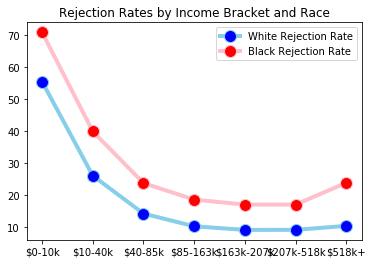

In [102]:
x_values = ['$0-10k', '$10-40k','$40-85k','$85-163k','$163k-207k','$207k-518k','$518k+']
y1_values = [55.494530, 26.015737, 14.133654, 10.164868,9.027158,9.058271,10.293484]
y2_values = [70.951658, 39.880038, 23.696660, 18.517326,16.957265,16.980620,23.787062]

df = pd.DataFrame(list(zip(x_values, y1_values, y2_values)),columns = ['Income Bracket', 
                                                                       'White Rejection Rate','Black Rejection Rate'])

plt.plot('Income Bracket', 'White Rejection Rate', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('Income Bracket', 'Black Rejection Rate', data=df, marker='o', markerfacecolor='red', markersize = 12, color='pink', linewidth=4)

plt.legend()
plt.title('Rejection Rates by Income Bracket and Race')
plt.show()

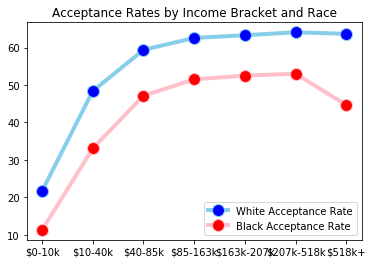

In [104]:
x_values = ['$0-10k', '$10-40k','$40-85k','$85-163k','$163k-207k','$207k-518k','$518k+']
y1_values = [21.676496, 48.383400, 59.390740, 62.571129,63.283229,64.088213,63.658735]
y2_values = [11.294169, 33.051776, 47.151183, 51.510545,52.505983,53.000000,44.642857]

df = pd.DataFrame(list(zip(x_values, y1_values, y2_values)),columns = ['Income Bracket', 
                                                                       'White Acceptance Rate','Black Acceptance Rate'])

plt.plot('Income Bracket', 'White Acceptance Rate', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('Income Bracket', 'Black Acceptance Rate', data=df, marker='o', markerfacecolor='red', markersize = 12, color='pink', linewidth=4)

plt.legend()
plt.title('Acceptance Rates by Income Bracket and Race')
plt.show()

The above chart is indicative of disparities in lending between Black and White applicants. This becomes especially clear when it is shown that the standard deviations of loan-to-income ratios, income, and loan amounts in most brackets is similar between the two despite having significant disparities in acceptance and rejection rates. We believe that this analysis of the acceptance and rejection rates between White and Black applicants is appropriate as it allows us to group by similar income brackets rather than looking at the dataset as a whole. Except for in the highest bracket, this limits significant outliers for income amounts in our analysis. In addition, we were able to compare standard deviations of loan amount and loan-to-income ratios to ensure that the data in these variables were not too differentiated between Black and White applicants. Through this, we were able to appropriately compare these two populations' experiences with lending data and judge the fairness of this system.

## The Results

The results of our analysis show significant disparities in access to loans between Black and White mortgage applicants. We were able to see that when grouped into different income brackets and taking into consideration the distributions of loan amounts of the application that the distributions of loan amount-to-income ratios were similar between both Black and White applicants. When this was taken into account, we saw that Black applicants were denied at higher rates and accepted at lower rates across the board compared to White applicants, even in higher income brackets. This was especially surprising considering that in those higher income brackets, White applicants through average and median had higher loan-to-income rations than Black applicants and were still getting approved at much higher rates. 

Also, it is notable that discrimination is the most significant among the highest income population. Looking at the above two charts, we can tell that the difference between Black and White populations is the widest in terms of both loan acceptance and denial rates. This difference is especially remarkable as White applicants in this income bracket had higher loan-to-income ratios for both mean and median than Black applicants. These data firmly imply that the richer a black applicant is, the more difficult it is for the applicant to enjoy financial opportunities than a white applicant with a similar economic background. Simply put, it's harder for black people to become super-rich and maintain their status once they became one, whereas, for white people, it's easier to become super-rich and maintain their super-rich status. Such a mechanism continues to reproduce the financial disparity between white and black populations, especially at the highest level of the wealth pyramid.

## The Cause of the Inequities

To look into the root cause of these inequities, we wanted to look into the history of discrimination in lending pratices. In the 1960s and before, there was a term known as "redlining", which was coined from an action where financial institutions would, quite literally, mark "minority neighborhoods in red" in order to label the people living there as "hazardous" to lenders (Folger, Investopedia). This, in turn, would result in the denial of credit and other financial services to many people who were a part of these minority groups. As a result of the 1968 Fair Housing Act and the 1977 Community Reinvestment Act, the practice of redlining was banned (Brooks, CBS). However, while redlining is now illegal, its effects are still longlasting and visible today. For example, when looking at San Diego, we are able to see that the areas that were once given high, desirable grades in the days of redlining such as coastal La Jolla are still very wealthy and have a White majority population while areas that received lower grades such as Barrio Logan, which tended to have large minority populations, had and continue to face financial hardships (Villafaña and Schroeder, San Diego Tribune). Through this, it can be argued that the main reason for the inequities in lending between White applicants and applicants from minority racial groups is one that is rooted in structural and systemic racism. It is noted that during the 2008 Financial Crisis, there were many cases where "African-Americans with similar credit profiles and down-payment ratios to white borrowers were more likely to receive subprime loans" (Carey, Reuters). Predatory loan practices against people of minority groups have been happening for a long time and it is evident from our earlier analysis that lending inequities still exist today. Due to the scope of our data, we can only see if loans were accepted or not but we are not able to determine the terms of those loans. It is possible that some the loans we saw in our dataset could have had unfavorable terms for Black applicants when compared to White applicants in the same financial situation. Taking this into consideration, the true nature of this inequity very well could be under represented in the scope of our research as it does not take into account the specificities of the loans given; it only takes into account the status of whether the loan was originated or not.  

Sources:

https://business.vanderbilt.edu/news/2020/07/20/racial-disparities-in-lending-markets/

https://www.pnas.org/content/116/19/9293)

https://ncrc.org/wp-content/uploads/2009/07/ncrc%20nosheild%20june%2009.pdf

https://www.cs.wustl.edu/~jain/papers/ftp/fairness.pdf

https://www.bostonfed.org/publications/research-department-working-paper/1992/mortgage-lending-in-boston-interpreting-hmda-data.aspx

https://academic.oup.com/rfs/article/34/2/763/5827007

https://www.consumerfinance.gov/data-research/hmda/historic-data/

https://fairmlbook.org/tutorial2.html

https://klinechair.missouri.edu/docs/vol_2_demands_of_equality.pdf

https://law.yale.edu/sites/default/files/documents/pdf/Intellectual_Life/ltw-Scanlon.pdf

https://www.investopedia.com/the-history-of-lending-discrimination-5076948

https://www.cbsnews.com/news/redlining-what-is-history-mike-bloomberg-comments/

https://www.sandiegouniontribune.com/communities/san-diego/story/2020-09-11/could-you-live-here-decades-old-redlining-still-shapes-san-diegos-neighborhoods-today-advocates-say

https://www.reuters.com/article/us-usa-foreclosures-race/racial-predatory-loans-fueled-u-s-housing-crisis-study-idUSTRE6930K520101004